In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from calendar import monthrange
from datetime import date

# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Single\\"
salt_type = "MgSO4"
building_id = 5
pricing = 'ToD'

In [24]:
# Read building data:
load = pd.read_excel(ResultsFolder + "Results_curbH_includeTES_True_"+salt_type+"_month_Year_NEEP50_"+pricing+"_Building_id_" + str(building_id)+".xlsx", sheet_name="load")
load = load.rename(columns={'Unnamed: 0': 'Hour'})
temp = pd.read_excel("C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\ext_temp.xlsx")
load['Outdoor Temp'] = temp['MI C']

tes_discharge = pd.read_excel(ResultsFolder + "Results_curbH_includeTES_True_"+salt_type+"_month_Year_NEEP50_"+pricing+"_Building_id_" + str(building_id)+".xlsx", sheet_name="TES")
hp_l = pd.read_excel(ResultsFolder + "Results_curbH_includeTES_True_"+salt_type+"_month_Year_NEEP50_"+pricing+"_Building_id_" + str(building_id)+".xlsx", sheet_name="HP output")
pur_elec = pd.read_excel(ResultsFolder + "Results_curbH_includeTES_True_"+salt_type+"_month_Year_NEEP50_"+pricing+"_Building_id_" + str(building_id)+".xlsx", sheet_name="purchased electricity")

load['TES Discharge (kWh)'] = tes_discharge['TES discharge (kWh)']
load['HP to load (kWh)'] = hp_l['HP output to load (kWh)']
load['Purchased Electricity (kWh)'] = pur_elec['Unnamed: 1']
load['SOC'] = tes_discharge['TES SOC (kWh)']
load = load.reset_index()
load['hour'] = load['index'] + 1
load

,index,Hour,Load (kWh),Outdoor Temp,TES Discharge (kWh),HP to load (kWh),Purchased Electricity (kWh),SOC,hour
0,0,hour 1,18.226712,-11.7,0.000000,18.226712,8.142741,0.000000,1
1,1,hour 2,16.987938,-17.2,0.000000,16.987938,24.159572,7.171634,2
2,2,hour 3,17.211558,-13.3,0.000000,17.211558,7.962416,7.171634,3
3,3,hour 4,17.015076,-15.6,0.000000,17.015076,9.248911,7.171634,4
4,4,hour 5,17.024729,-15.0,9.151669,7.873059,9.455777,9.151669,5
...,...,...,...,...,...,...,...,...,...
8755,8755,hour 8756,10.927158,2.8,0.002426,10.924732,3.275585,0.002426,8756
8756,8756,hour 8757,10.946176,3.9,0.001201,10.944975,3.193189,0.001201,8757
8757,8757,hour 8758,11.004044,4.4,0.000594,11.003449,3.171388,0.000594,8758
8758,8758,hour 8759,11.873651,3.9,0.000294,11.873357,3.464044,0.000294,8759


In [25]:
# Graphing:
mon_to_run = 1
year = 2018

if mon_to_run == 'Year':
    day = 365                                   # Equivalent days
    starting_day = 0
else:
    day = monthrange(year, mon_to_run)[1]       # number of days in specified month
    starting_day = (date(year, mon_to_run, 1) - date(year, 1, 1)).days

hour = day * 24
starting_hour = starting_day * 24
end_hour = starting_hour + hour

# Get COP:
load_cop50_raw = pd.read_excel('C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\cop_temp.xlsx', sheet_name='cop NEEP50')
load['COP'] = 0.000

for i in list(range(len(load['Outdoor Temp']))):
    load_cop50_raw['temp_diff'] = abs(load['Outdoor Temp'][i] - load_cop50_raw['temp C'])
    min_id50 = load_cop50_raw['temp_diff'].idxmin(axis=0)
    load['COP'][i] = float(load_cop50_raw['COP NEEP50'][min_id50])
load

C:\Users\atpha\AppData\Local\Temp\ipykernel_2588\1827809075.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load['COP'][i] = float(load_cop50_raw['COP NEEP50'][min_id50])


,index,Hour,Load (kWh),Outdoor Temp,TES Discharge (kWh),HP to load (kWh),Purchased Electricity (kWh),SOC,hour,COP
0,0,hour 1,18.226712,-11.7,0.000000,18.226712,8.142741,0.000000,1,2.238400
1,1,hour 2,16.987938,-17.2,0.000000,16.987938,24.159572,7.171634,2,1.000000
2,2,hour 3,17.211558,-13.3,0.000000,17.211558,7.962416,7.171634,3,2.161600
3,3,hour 4,17.015076,-15.6,0.000000,17.015076,9.248911,7.171634,4,1.839684
4,4,hour 5,17.024729,-15.0,9.151669,7.873059,9.455777,9.151669,5,2.029609
...,...,...,...,...,...,...,...,...,...,...
8755,8755,hour 8756,10.927158,2.8,0.002426,10.924732,3.275585,0.002426,8756,3.335200
8756,8756,hour 8757,10.946176,3.9,0.001201,10.944975,3.193189,0.001201,8757,3.427600
8757,8757,hour 8758,11.004044,4.4,0.000594,11.003449,3.171388,0.000594,8758,3.469600
8758,8758,hour 8759,11.873651,3.9,0.000294,11.873357,3.464044,0.000294,8759,3.427600


In [27]:
# Compare heat pump outputs:
hp = pd.read_excel(ResultsFolder + "Results_includeTES_False__month_Year_NEEP50_"+pricing+"_Building_id_" + str(building_id)+".xlsx", sheet_name="HP output")
hp_wTES = pd.read_excel(ResultsFolder + "Results_curbH_includeTES_True_MgSO4_month_Year_NEEP50_"+pricing+"_Building_id_" + str(building_id)+".xlsx", sheet_name="HP output")
hp['HP output total - w/TES (kWh)'] = hp_wTES['HP output total (kWh)']
hp['HP output to TES (kWh)'] = hp_wTES['HP output to TES (kWh)']
hp_truncated = hp.truncate(before=starting_hour, after=end_hour)
hp = hp.reset_index()
hp = hp.rename(columns={'index': 'hour'})
hp['hour'] = hp['hour'] + 1

hp_noTES = hp['HP output total (kWh)'].sum()
hp_TES = hp['HP output total - w/TES (kWh)'].sum()
ht_pct = hp_TES/hp_noTES
hp

,hour,Unnamed: 0,Unnamed: 1,HP output to load (kWh),HP output total (kWh),HP output total - w/TES (kWh),HP output to TES (kWh)
0,1,NaN,NaN,18.226712,18.226712,18.226712,0.000000
1,2,NaN,NaN,16.987938,16.987938,24.159572,7.171634
2,3,NaN,NaN,17.211558,17.211558,17.211558,0.000000
3,4,NaN,NaN,17.015076,17.015076,17.015076,0.000000
4,5,NaN,NaN,17.024729,17.024729,19.191533,11.318474
...,...,...,...,...,...,...,...
8755,8756,NaN,NaN,10.927158,10.927158,10.924732,0.000000
8756,8757,NaN,NaN,10.946176,10.946176,10.944975,0.000000
8757,8758,NaN,NaN,11.004044,11.004044,11.003449,0.000000
8758,8759,NaN,NaN,11.873651,11.873651,11.873357,0.000000


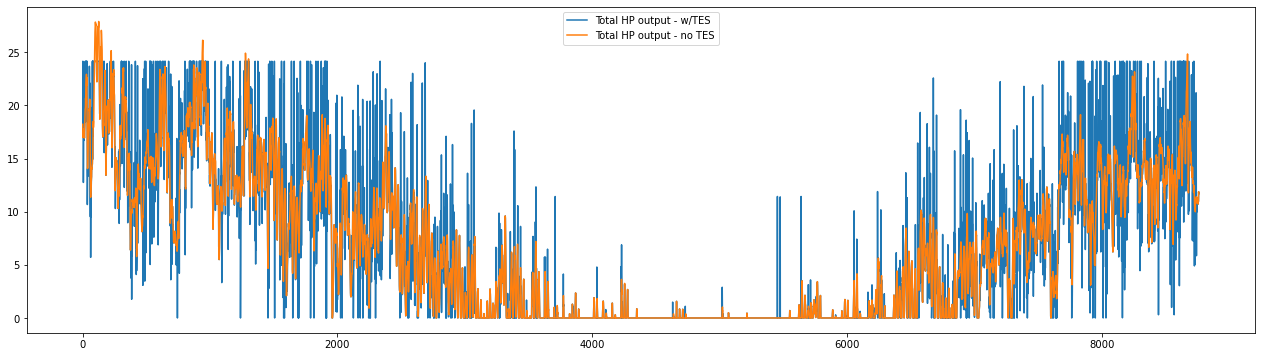

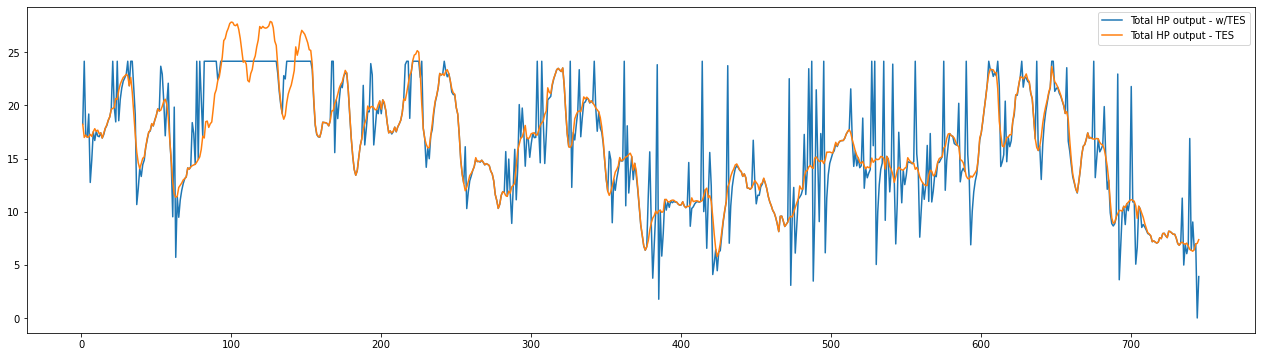

In [28]:
# Graph:
hp_truncated = hp.truncate(before=starting_hour, after=end_hour)
load_truncated = load.truncate(before=starting_hour, after=end_hour)

fig, ax1 = plt.subplots(figsize=(22,6))
#plt.plot(hp['hour'], load['Load (kWh)'], label='Load')
ax1.plot(hp['hour'], hp['HP output total - w/TES (kWh)'], label='Total HP output - w/TES')
ax1.plot(hp['hour'], hp['HP output total (kWh)'], label='Total HP output - no TES')
ax1.legend(loc='upper center')
#ax2 = ax1.twinx()
#ax2.plot(load['hour'], load['COP'], label = "COP", color='orange',linewidth=3)
#ax2.legend(loc='upper center')

fig, ax1 = plt.subplots(figsize=(22,6))
#plt.plot(hp_truncated['hour'], load_truncated['Load (kWh)'], label='Load')
ax1.plot(hp_truncated['hour'], hp_truncated['HP output total - w/TES (kWh)'], label='Total HP output - w/TES')
ax1.plot(hp_truncated['hour'], hp_truncated['HP output total (kWh)'], label='Total HP output - TES')
ax1.legend(loc='upper right')
#ax2 = ax1.twinx()
#ax2.plot(load_truncated['hour'], load_truncated['COP'], label = "COP", color='orange',linewidth=3)
#ax2.legend(loc='upper center')

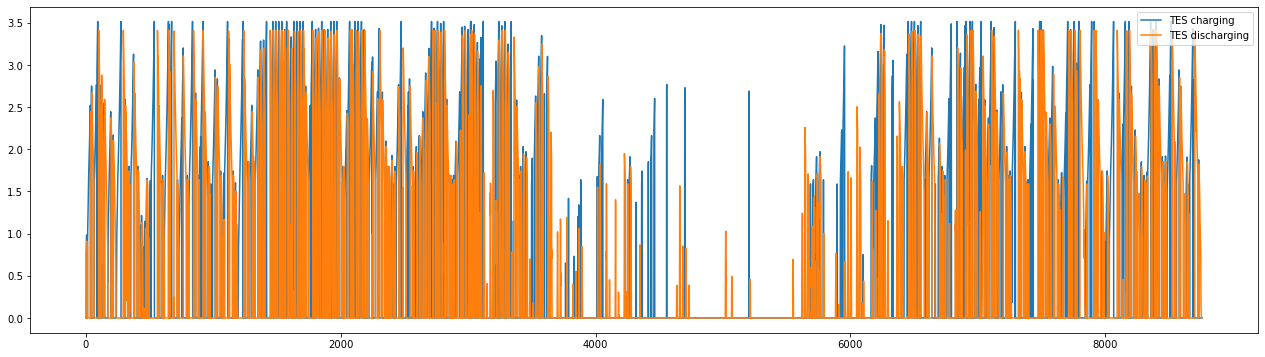

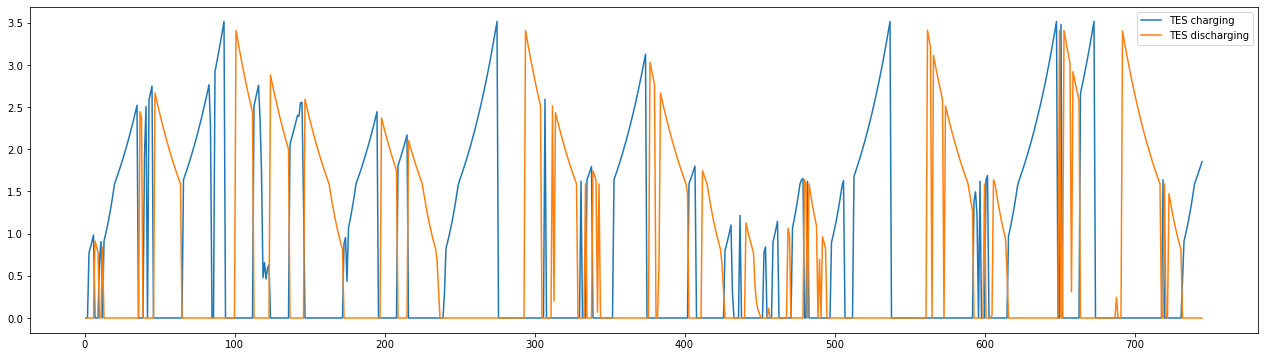

In [19]:
# TES charging vs discharging:
fig, ax = plt.subplots(figsize=(22,6))
#plt.plot(hp['hour'], load['Load (kWh)'], label='Load')
plt.plot(hp['hour'], hp['HP output to TES (kWh)'], label='TES charging')
plt.plot(hp['hour'], load['TES Discharge (kWh)'], label='TES discharging')
plt.legend(loc='upper right')

fig, ax = plt.subplots(figsize=(22,6))
#plt.plot(hp['hour'], load['Load (kWh)'], label='Load')
plt.plot(load_truncated['hour'], hp_truncated['HP output to TES (kWh)'], label='TES charging')
plt.plot(load_truncated['hour'], load_truncated['TES Discharge (kWh)'], label='TES discharging')
plt.legend(loc='upper right')